In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/dataframe.csv',index_col=0)
weather = pd.read_csv('../data/clean_weather.csv', index_col=0)
train = pd.read_csv('../data/train_clean.csv',  index_col=0)

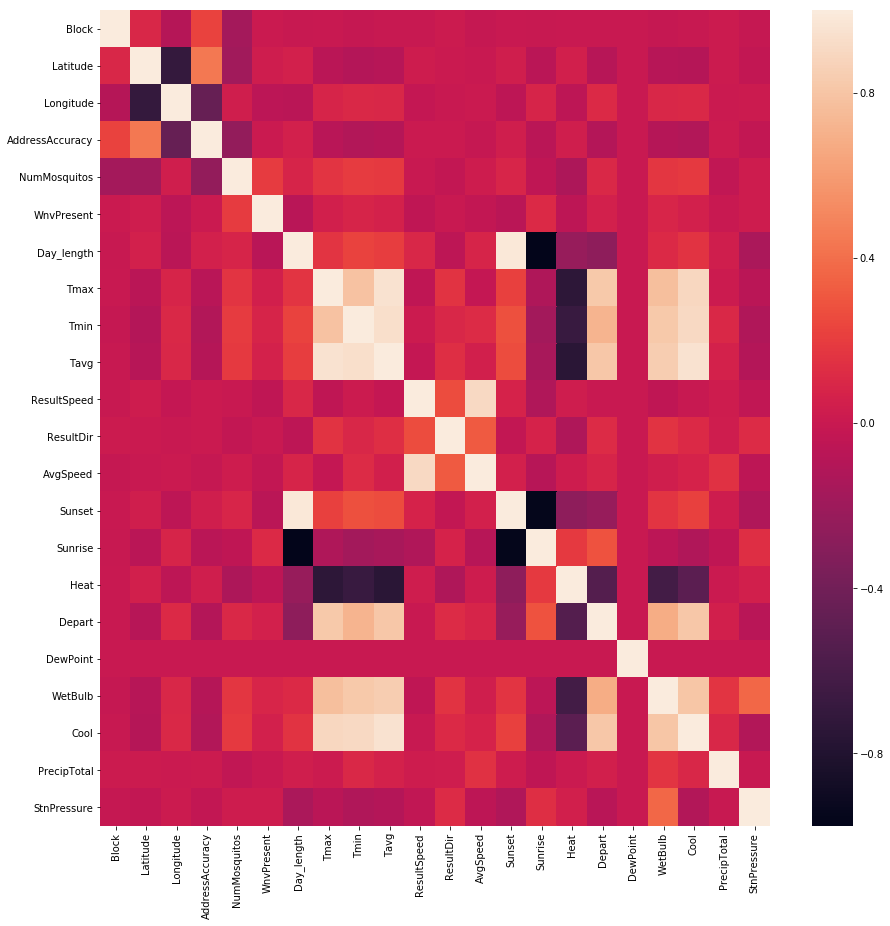

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax', 'Tmin', 'Tavg',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset', 'Sunrise', 'Heat',
       'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum', 'PrecipTotal',
       'StnPressure'],
      dtype='object')

In [8]:
grouped_traps = df.groupby(['Date','Trap','Species'])[['NumMosquitos', 'WnvPresent']].sum()

In [9]:
flat_groups = grouped_traps.reset_index().set_index('Date')

In [10]:
flat_groups['WnvPresent'] = flat_groups['WnvPresent'].map(lambda x: int(x > 0))

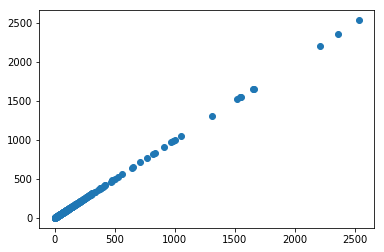

In [11]:
plt.scatter(flat_groups.NumMosquitos.value_counts().index, flat_groups.NumMosquitos.value_counts().index)

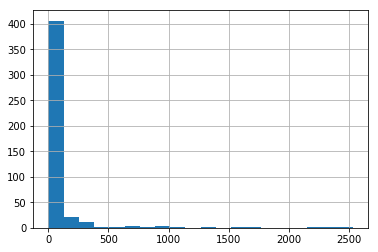

In [12]:
flat_groups[flat_groups['WnvPresent']==1].NumMosquitos.hist(bins=20)

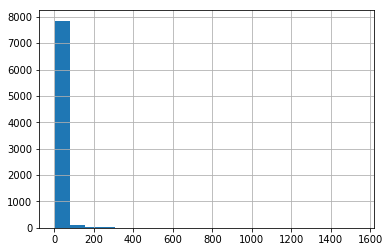

In [13]:
flat_groups[flat_groups['WnvPresent']==0].NumMosquitos.hist(bins=20)

In [15]:
df2 = pd.merge(flat_groups, df[['Day_length','Tmax','Tmin', 'Tavg',
       'ResultSpeed','ResultDir', 'AvgSpeed','Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure']].drop_duplicates(), how='left', left_index=True, right_index=True)

In [16]:
df2['Date'] = df2.index

In [17]:
df3 = pd.merge(df2, df[['Latitude', 'Longitude', 'Trap']].drop_duplicates(), how='left', on='Trap')

In [18]:
df3.shape

(8643, 24)

In [19]:
df3.head()

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Date,Latitude,Longitude
0,T002,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
1,T002,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
2,T007,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.994991,-87.769279
3,T015,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812
4,T015,CULEX RESTUANS,4,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812


In [21]:
df3.to_csv('../data/final_dataframe.csv')